In [1]:
import xarray_behave as xb
import numpy as np
import matplotlib.pyplot as plt
import xarray_behave.metrics as mt


datenames = ['localhost-20190703_101857',
               'localhost-20190703_104113',
               'localhost-20190703_105557',
               'localhost-20190703_110854',
               'localhost-20190703_112309',
               'localhost-20190703_135932',
               'localhost-20181217_092542',
               'localhost-20181212_102357',
               'localhost-20181129_171011',
               'localhost-20181129_152532',
               'localhost-20181122_153211',
               'localhost-20181122_163213',
               'localhost-20181121_162138',
               'localhost-20181120_144618',
               'localhost-20181120_150816',
               'localhost-20181120_153406',
               'localhost-20181120_160026',
               'localhost-20181120_161230',
               'localhost-20181015_101001']
datename = datenames[0]#'localhost-20190703_110854'
root = '/Volumes/ukme04/#Common/chainingmic'

/Users/jclemens/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [7]:
ds = xb.assemble(datename, root, include_song=False)
dsm = xb.assemble_metrics(ds)
ds

/Users/jclemens/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1520: RuntimeWarning: invalid value encountered in greater
  _nx.copyto(ddmod, pi, where=(ddmod == -pi) & (dd > 0))
/Users/jclemens/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1522: RuntimeWarning: invalid value encountered in less
  _nx.copyto(ph_correct, 0, where=abs(dd) < discont)


<xarray.Dataset>
Dimensions:              (bodyparts: 3, coords: 2, flies: 2, poseparts: 12, time: 603093)
Coordinates:
  * time                 (time) float64 0.0 0.001 0.002 ... 603.1 603.1 603.1
  * bodyparts            (bodyparts) <U6 'head' 'center' 'tail'
    nearest_frame        (time) uint64 663 663 663 664 ... 60930 60930 60930
  * coords               (coords) <U1 'y' 'x'
  * poseparts            (poseparts) object 'head' 'neck' ... 'tail'
Dimensions without coordinates: flies
Data variables:
    body_positions       (time, flies, bodyparts, coords) float64 364.3 ... 95.32
    pose_positions       (time, flies, poseparts, coords) float64 27.76 ... nan
    pose_positions_allo  (time, flies, poseparts, coords) float64 363.6 ... nan
Attributes:
    video_filename:  /Volumes/ukme04/#Common/chainingmic/dat/localhost-201907...
    datename:        localhost-20190703_101857
    root:            /Volumes/ukme04/#Common/chainingmic
    dat_path:        dat
    res_path:        res

In [8]:
fly_size = mt.distance(ds.pose_positions.sel(poseparts='head').values, ds.pose_positions.sel(poseparts='tail').values, exclude_cross_terms=True)
fly_size = mt.smooth(fly_size, 512) 

fly_dist = mt.distance(ds.pose_positions_allo.sel(poseparts='thorax').values)
fly_dist = fly_dist[:, 0, 1]

fly_speed = dsm.abs_features.sel(absolute_features='velocity_magnitude')


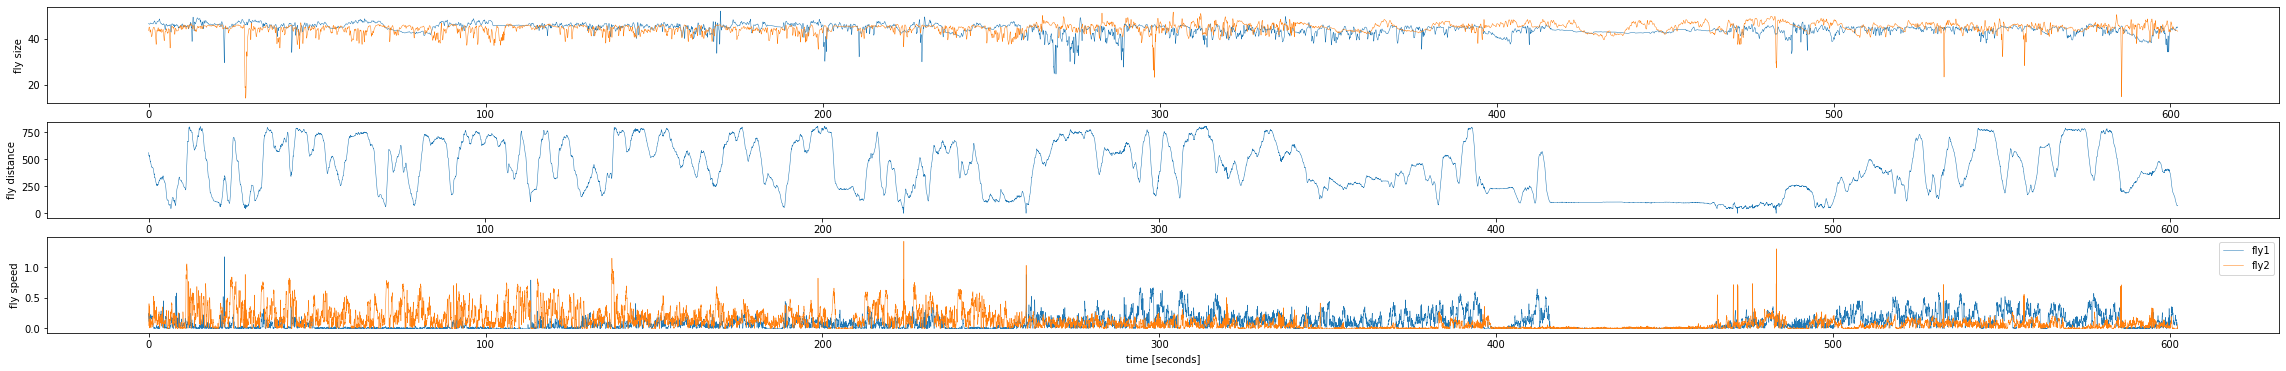

In [10]:
plt.gcf().set_size_inches(40, 6)
plt.subplot(311)
plt.plot(ds.time, fly_size, linewidth=0.5)
plt.ylabel('fly size')

plt.subplot(312)
plt.plot(ds.time, fly_dist, linewidth=0.5)
plt.ylabel('fly distance')

plt.subplot(313)
plt.plot(ds.time, fly_speed, linewidth=0.5)
plt.ylabel('fly speed')
plt.xlabel('time [seconds]')
plt.legend(['fly1', 'fly2'])